In [1]:
#グラフをnotebook内に描画させるための設定
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# pandasでの表示列を増やす
# see: http://uyamazak.hatenablog.com/entry/2016/09/29/163534
pd.set_option("display.max_column", 101)

In [2]:
df_data = pd.read_csv("./kc_house_data.csv", parse_dates=['date'])
display(df_data.head(10))
display(df_data.info())
display(df_data.describe())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_data['month'] = df_data['date']

## 地理

In [3]:
df_data.groupby('zipcode').agg({'id': 'count', 'price': [np.max, np.min, np.mean, np.std]}).sort_values([('price', 'std')], ascending=False)

id      price                                      
        count       amax      amin          mean           std
zipcode                                                       
98039      50  6885000.0  787500.0  2.160607e+06  1.166477e+06
98102     105  7700000.0  330000.0  9.012583e+05  7.866621e+05
98004     317  7062500.0  425000.0  1.355927e+06  7.458201e+05
98040     282  5300000.0  500000.0  1.194230e+06  6.074935e+05
98112     269  3400000.0  169317.0  1.095499e+06  5.937596e+05
98105     229  3650000.0  380000.0  8.628252e+05  4.772876e+05
98033     432  5110800.0  130000.0  8.037195e+05  4.625210e+05
98109     109  3200000.0  216650.0  8.796236e+05  4.552288e+05
98006     498  4208000.0  247500.0  8.596848e+05  4.459116e+05
98177     255  3800000.0  245560.0  6.761854e+05  4.358499e+05
98119     184  3065000.0  300523.0  8.494480e+05  4.337225e+05
98008     283  3567000.0  250000.0  6.455074e+05  4.215900e+05
98144     343  3600000.0  181000.0  5.945477e+05  4.005904e+05
98199     317  3200000.0  323000.0  7.918208e+05  3.978682e+05
98024      81  1862000.0  142000.0  5.805268e+05  3.774052e+05
98034     545  3120000.0   90000.0  5.216529e+05  3.096256e+05
98166     254  2510000.0  100000.0  4.642318e+05  2.964630e+05
98027     412  2700000.0  130000.0  6.169906e+05  2.908425e+05
98075     359  3200000.0  406430.0  7.905767e+05  2.852754e+05
98122     290  2050000.0  202000.0  6.343602e+05  2.848886e+05
98053     405  2280000.0  170000.0  6.781631e+05  2.720928e+05
98005     168  1960000.0  400000.0  8.101649e+05  2.687537e+05
98155     446  4500000.0  153000.0  4.237257e+05  2.682093e+05
98074     441  3075000.0  280000.0  6.856058e+05  2.681413e+05
98077     198  1920000.0  250000.0  6.827749e+05  2.643384e+05
98014     124  1680000.0   80000.0  4.556171e+05  2.586034e+05
98116     330  2050000.0  130000.0  6.186342e+05  2.517401e+05
98136     263  2230000.0  200000.0  5.516887e+05  2.506395e+05
98115     583  2300000.0  200000.0  6.199005e+05  2.373634e+05
98059     468  1780000.0  172500.0  4.935525e+05  2.328295e+05
...       ...        ...       ...           ...           ...
98007     141  1315000.0  295000.0  6.171051e+05  1.999402e+05
98052     574  2200000.0  225000.0  6.452315e+05  1.975138e+05
98010     100   935000.0  135000.0  4.236660e+05  1.954150e+05
98117     553  1370000.0  125000.0  5.767950e+05  1.883241e+05
98065     310  1998000.0  170000.0  5.279612e+05  1.856245e+05
98178     262  1700000.0   90000.0  3.106128e+05  1.610447e+05
98126     354  1085000.0  110000.0  4.247064e+05  1.585096e+05
98198     280  1350000.0   95000.0  3.028789e+05  1.547993e+05
98028     283  1600000.0  160000.0  4.624800e+05  1.494902e+05
98038     590  1350000.0  110000.0  3.668676e+05  1.326628e+05
98019     190  1015000.0  119500.0  4.247887e+05  1.305182e+05
98058     455  1500000.0   95000.0  3.536086e+05  1.286707e+05
98022     234   858000.0   75000.0  3.157093e+05  1.230849e+05
98092     351   930000.0   90000.0  3.349211e+05  1.229719e+05
98011     195  1075000.0  245500.0  4.903515e+05  1.218467e+05
98023     499  1275000.0   86500.0  2.867328e+05  1.087720e+05
98003     280   950000.0  128000.0  2.941113e+05  1.075977e+05
98042     548   859000.0  105000.0  3.116321e+05  1.060230e+05
98108     186   640000.0   90000.0  3.556785e+05  1.042055e+05
98188     136   707000.0  110000.0  2.890783e+05  1.031066e+05
98133     494   808100.0  130000.0  3.869974e+05  1.008664e+05
98001     362   850000.0  100000.0  2.808047e+05  9.897923e+04
98106     335   795000.0   90000.0  3.195814e+05  9.771559e+04
98055     268   631000.0  100000.0  3.042621e+05  9.343898e+04
98148      57   600600.0  105500.0  2.849086e+05  8.961694e+04
98031     274   800000.0  147500.0  3.005399e+05  7.867790e+04
98030     256   565000.0  120000.0  2.961880e+05  7.280810e+04
98168     269   600000.0   78000.0  2.403284e+05  6.998482e+04
98032     125   545000.0   85000.0  2.512962e+05  6.470543e+04
98002     199   389000.0   95000.0  2.3428

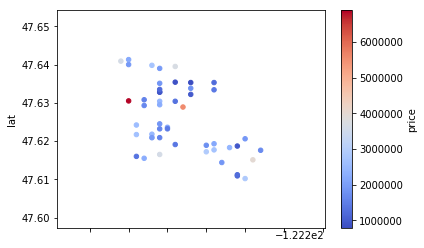

In [9]:
df_data[df_data['zipcode'] == 98039].plot.scatter(x='long', y='lat', c='price', cmap='coolwarm')

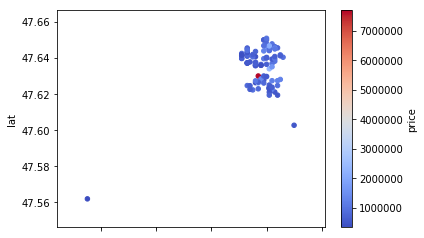

In [8]:
df_data[df_data['zipcode'] == 98102].plot.scatter(x='long', y='lat', c='price', cmap='coolwarm')

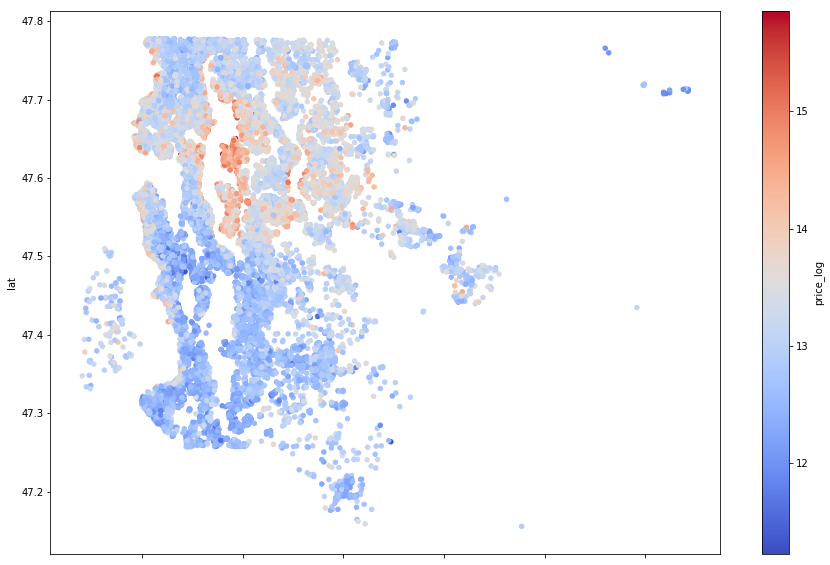

In [13]:
df_data['price_log'] = np.log(df_data['price'])
df_data.plot.scatter(x='long', y='lat', c='price_log', cmap='coolwarm', figsize=(15, 10))

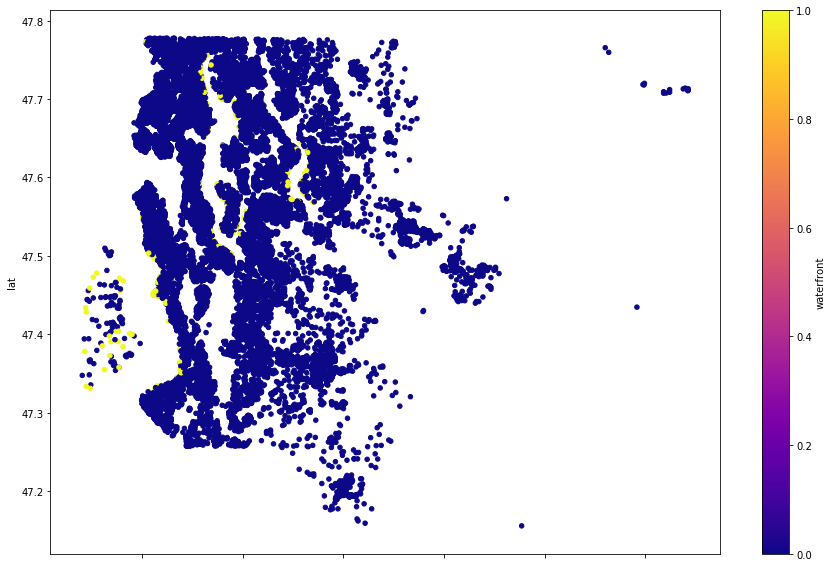

In [18]:
df_data.plot.scatter(x='long', y='lat', c='waterfront', colormap='plasma', figsize=(15, 10))